In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
import sqlite3

###  Data Extraction

In [81]:
###Database Connection
Database = r"C:\Users\TaLaL\Desktop\SDAIA\Students.db"
Conn = sqlite3.connect(Database)
df = pd.read_sql_query("SELECT * from Exams" , con=Conn)
Conn.close()

In [87]:
df.columns = df.columns.str.replace('/', '_')
df.columns = df.columns.str.replace(' ', '_')
df.head()

,Gender,Race_Ethnicity,Parental_level_of_education,Lunch,Test_preparation_course,Math_score,Reading_score,Writing_score
0,male,group C,bachelor's degree,standard,completed,84.0,85.0,81.0
1,female,group D,associate's degree,standard,completed,76.0,82.0,85.0
2,female,group C,associate's degree,standard,completed,62.0,77.0,79.0
3,male,group B,high school,standard,none,72.0,64.0,59.0
4,female,group B,high school,standard,none,73.0,94.0,91.0


In [84]:
df.dtypes

Gender                          object
Race_Ethnicity                  object
Parental_level_of_education     object
Lunch                           object
Test_preparation_course         object
Math_score                     float64
Reading_score                  float64
Writing_score                  float64
dtype: object

In [85]:
df.describe(include='all')

,Gender,Race_Ethnicity,Parental_level_of_education,Lunch,Test_preparation_course,Math_score,Reading_score,Writing_score
count,10001,10000,10000,10000,10000,10000.000000,10000.000000,10000.000000
unique,3,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,5080,3133,2339,6536,6493,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.760500,69.750500,68.589300
std,NaN,NaN,NaN,NaN,NaN,15.260119,14.644866,15.304962
min,NaN,NaN,NaN,NaN,NaN,6.000000,14.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,56.000000,60.000000,58.000000
50%,NaN,NaN,NaN,NaN,NaN,67.000000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,78.000000,80.000000,79.000000


### Data Cleaning

In [89]:
##Check for missing values
df.isnull().sum()

Gender                         0
Race_Ethnicity                 1
Parental_level_of_education    1
Lunch                          1
Test_preparation_course        1
Math_score                     1
Reading_score                  1
Writing_score                  1
dtype: int64

In [99]:
###Remove missing values
df = df[df.Math_score.notnull()]

In [98]:
df.tail()

,Gender,Race_Ethnicity,Parental_level_of_education,Lunch,Test_preparation_course,Math_score,Reading_score,Writing_score,Math_PassStatus
9995,female,group D,some college,free/reduced,none,62.0,77.0,73.0,P
9996,female,group B,high school,standard,none,26.0,32.0,31.0,F
9997,female,group C,some high school,standard,completed,80.0,92.0,100.0,P
9998,female,group B,some high school,standard,none,52.0,60.0,55.0,P
9999,male,group B,bachelor's degree,standard,none,68.0,65.0,65.0,P


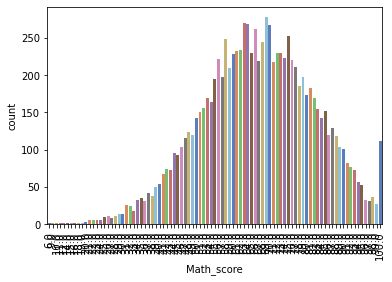

In [94]:
passmark = 40
p = sns.countplot(x="Math_score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [97]:
df['Math_PassStatus'] = np.where(df['Math_score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    9601
F     399
Name: Math_PassStatus, dtype: int64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       10000 non-null  object 
 1   Race_Ethnicity               10000 non-null  object 
 2   Parental_level_of_education  10000 non-null  object 
 3   Lunch                        10000 non-null  object 
 4   Test_preparation_course      10000 non-null  object 
 5   Math_score                   10000 non-null  float64
 6   Reading_score                10000 non-null  float64
 7   Writing_score                10000 non-null  float64
 8   Math_PassStatus              10000 non-null  object 
dtypes: float64(3), object(6)
memory usage: 781.2+ KB


In [103]:
df.head()

,Gender,Race_Ethnicity,Parental_level_of_education,Lunch,Test_preparation_course,Math_score,Reading_score,Writing_score,Math_PassStatus
0,male,group C,bachelor's degree,standard,completed,84.0,85.0,81.0,P
1,female,group D,associate's degree,standard,completed,76.0,82.0,85.0,P
2,female,group C,associate's degree,standard,completed,62.0,77.0,79.0,P
3,male,group B,high school,standard,none,72.0,64.0,59.0,P
4,female,group B,high school,standard,none,73.0,94.0,91.0,P


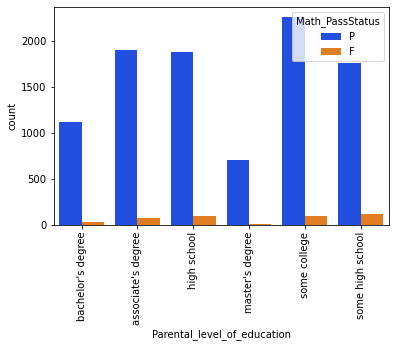

In [105]:
p = sns.countplot(x='Parental_level_of_education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

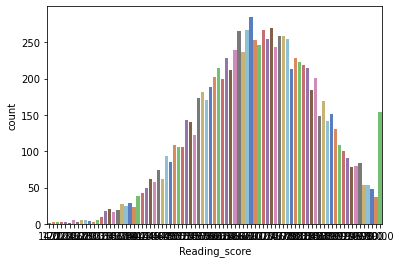

In [107]:
sns.countplot(x="Reading_score", data = df, palette="muted")
plt.show()

In [108]:
df['Reading_PassStatus'] = np.where(df['Reading_score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    9772
F     228
Name: Reading_PassStatus, dtype: int64